# NIC IDC Examples

These examples are pulled from the [IDC_segmentation_primer](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/IDC_segmentation_primer.ipynb) notebook and provide some of the example data shown there for a fast, simple way to begin quickly visualizing and interacting with CT data.

You can run this notebook locally or with any of the following platforms: 
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/IDC_Seg_Primer_Examples.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitk%2FIDC_Seg_Primer_Examples.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/IDC_Seg_Primer_Examples.ipynb)

In [1]:
import sys

!{sys.executable} -m pip install -q itk-io "itkwidgets[all]>=1.0a53" idc-index itkwasm-dicom

In [1]:
from pathlib import Path

import itk
from itkwasm_dicom import read_segmentation
import numpy as np
from rich import print

from itkwidgets import view

## Getting Started

As you experiment with itkwidgets you will find that there are a lot of great features in the drawer (which can be toggled open/close with the hamburger menu in the upper left corner). The image below highlights some of the key features you may want to use right away but you can also hover over anything to get a quick tooltip that describes what it does.

Quick tip: Does your data look like it's low resolution? No worries! In order to handle large datasets itkwidgets streams the data in chunks which means that the resolution improves steadily as the data becomes available to the viewer. There will be a spinning circle next to the image label that indicates this process is still in progress. If the circle has disappeared check the resolution drop-down menu - a lower value means higher resolution.

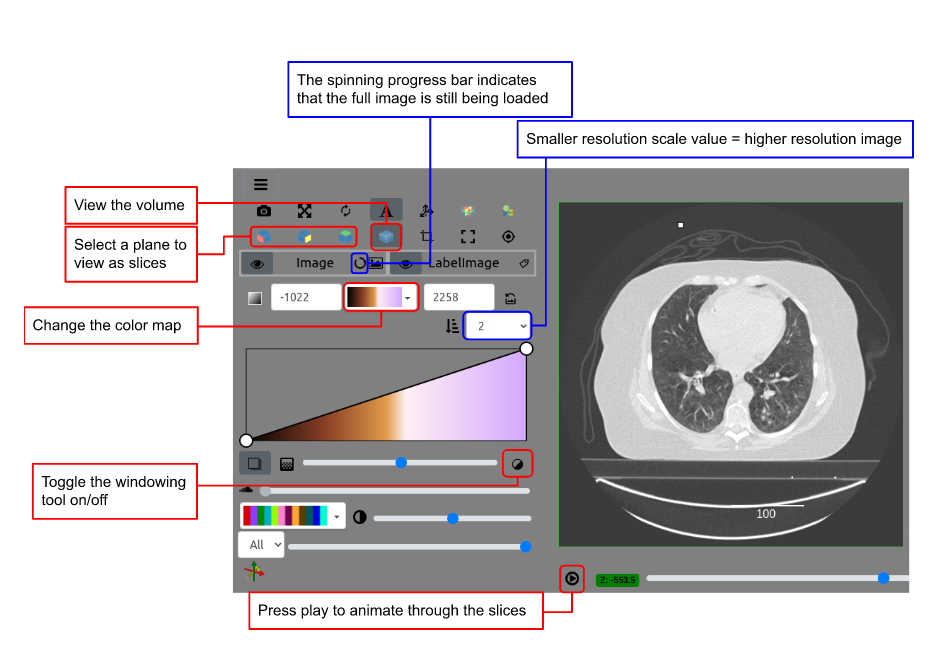

## Segmentation of thoracic structures from CT series

In [2]:
ct_dicom_series_uid = '1.2.840.113654.2.55.247854884634057477137769379611681725965'
seg_dicom_series_uid = '1.2.276.0.7230010.3.1.3.481034752.249602.1661572065.734219'

In [4]:
%%capture
# CT series downloaded from IDC, NLST collection (https://doi.org/10.7937/TCIA.HMQ8-J677)
!idc download {ct_dicom_series_uid}

# segmentation of this series downloaded from IDC, from nnU-Net-BPR-Annotations (https://doi.org/10.5281/zenodo.7539035)
!idc download {seg_dicom_series_uid}

In [3]:
images_dir = Path('nlst') / '100147' / '1.2.840.113654.2.55.133032926508606330165457723341736723804'
ct_dir = images_dir / 'CT_1.2.840.113654.2.55.247854884634057477137769379611681725965'
seg_dir = images_dir / 'SEG_1.2.276.0.7230010.3.1.3.481034752.249602.1661572065.734219'

In [4]:
ct_image = itk.imread(ct_dir)

In [25]:
seg_image, seg_info = read_segmentation(seg_dir / "6c8744b0-5dd7-4730-bef7-1ab465ec2337.dcm")

Row direction: 1 0 0
Col direction: 0 -1 0
Z direction: 0 0 -1
Total frames: 265
Total frames with unique IPP: 109
Total overlapping frames: 94
Origin: [-177.3, 168.34, 3.81]
Slice extent: 270
Slice spacing: 2.5
Image Orientation Patient set to : 1, 0, 0, 0, -1, 0
Identified 1 groups of non-overlapping segments


In [7]:
print(seg_info)

{
    'BodyPartExamined': 'CHEST',
    'ClinicalTrialCoordinatingCenterName': 'dcmqi',
    'ClinicalTrialSeriesID': '0',
    'ClinicalTrialTimePointID': '1',
    'ContentCreatorName': 'IDC',
    'InstanceNumber': '1',
    'SeriesDescription': '3d_fullres-tta_nnU-Net_Segmentation',
    'SeriesNumber': '42',
    'segmentAttributes': [
        [
            {
                'SegmentAlgorithmName': '3d_fullres-tta_nnU-Net',
                'SegmentAlgorithmType': 'AUTOMATIC',
                'SegmentDescription': '',
                'SegmentLabel': 'Esophagus',
                'SegmentedPropertyCategoryCodeSequence': {
                    'CodeMeaning': 'Anatomical Structure',
                    'CodeValue': '123037004',
                    'CodingSchemeDesignator': 'SCT'
                },
                'SegmentedPropertyTypeCodeSequence': {
                    'CodeMeaning': 'Esophagus',
                    'CodeValue': '32849002',
                    'CodingSchemeDesignator': 'SCT'
                },
                'labelID': 1,
                'recommendedDisplayRGBValue': [26, 113, 217]
            },
            {
                'SegmentAlgorithmName': '3d_fullres-tta_nnU-Net',
                'SegmentAlgorithmType': 'AUTOMATIC',
                'SegmentDescription': '',
                'SegmentLabel': 'Heart',
                'SegmentedPropertyCategoryCodeSequence': {
                    'CodeMeaning': 'Anatomical Structure',
                    'CodeValue': '123037004',
                    'CodingSchemeDesignator': 'SCT'
                },
                'SegmentedPropertyTypeCodeSequence': {
                    'CodeMeaning': 'Heart',
                    'CodeValue': '80891009',
                    'CodingSchemeDesignator': 'SCT'
                },
                'labelID': 2,
                'recommendedDisplayRGBValue': [5, 183, 61]
            },
            {
                'SegmentAlgorithmName': '3d_fullres-tta_nnU-Net',
                'SegmentAlgorithmType': 'AUTOMATIC',
                'SegmentDescription': '',
                'SegmentLabel': 'Trachea',
                'SegmentedPropertyCategoryCodeSequence': {
                    'CodeMeaning': 'Anatomical Structure',
                    'CodeValue': '123037004',
                    'CodingSchemeDesignator': 'SCT'
                },
                'SegmentedPropertyTypeCodeSequence': {
                    'CodeMeaning': 'Trachea',
                    'CodeValue': '44567001',
                    'CodingSchemeDesignator': 'SCT'
                },
                'labelID': 3,
                'recommendedDisplayRGBValue': [226, 62, 62]
            },
            {
                'SegmentAlgorithmName': '3d_fullres-tta_nnU-Net',
                'SegmentAlgorithmType': 'AUTOMATIC',
                'SegmentDescription': '',
                'SegmentLabel': 'Aorta',
                'SegmentedPropertyCategoryCodeSequence': {
                    'CodeMeaning': 'Anatomical Structure',
                    'CodeValue': '123037004',
                    'CodingSchemeDesignator': 'SCT'
                },
                'SegmentedPropertyTypeCodeSequence': {
                    'CodeMeaning': 'Aorta',
                    'CodeValue': '15825003',
                    'CodingSchemeDesignator': 'SCT'
                },
                'labelID': 4,
                'recommendedDisplayRGBValue': [250, 194, 39]
            }
        ]
    ]
}


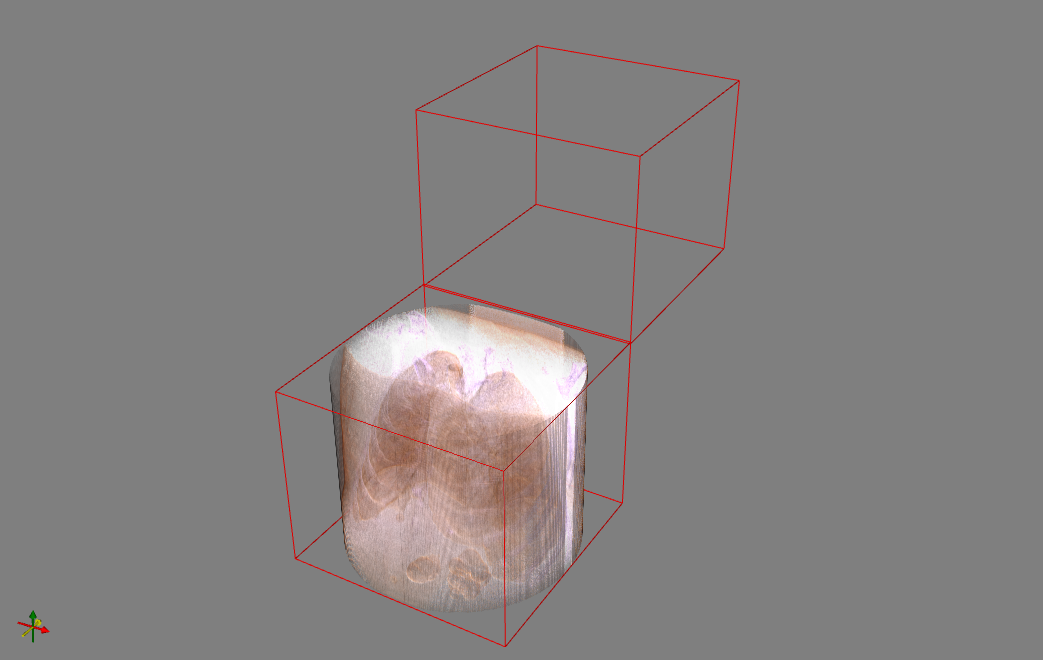
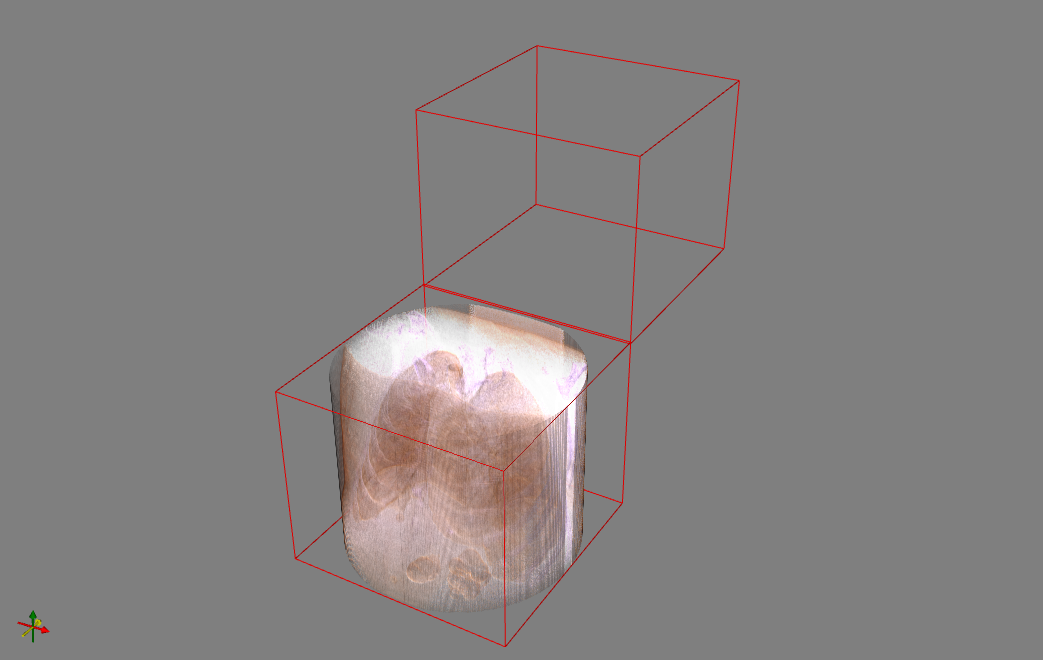

<IPython.core.display.Javascript object>

In [26]:
segthor_viewer = view(ct_image, label_image=seg_image)

In [24]:
segthor_viewer.set_image_color_range([-1260, 2385])
segthor_viewer.set_label_image_blend(0.90)
segthor_viewer.set_image_gradient_opacity(0.45)
segthor_viewer.set_image_gradient_opacity_scale(0.55)


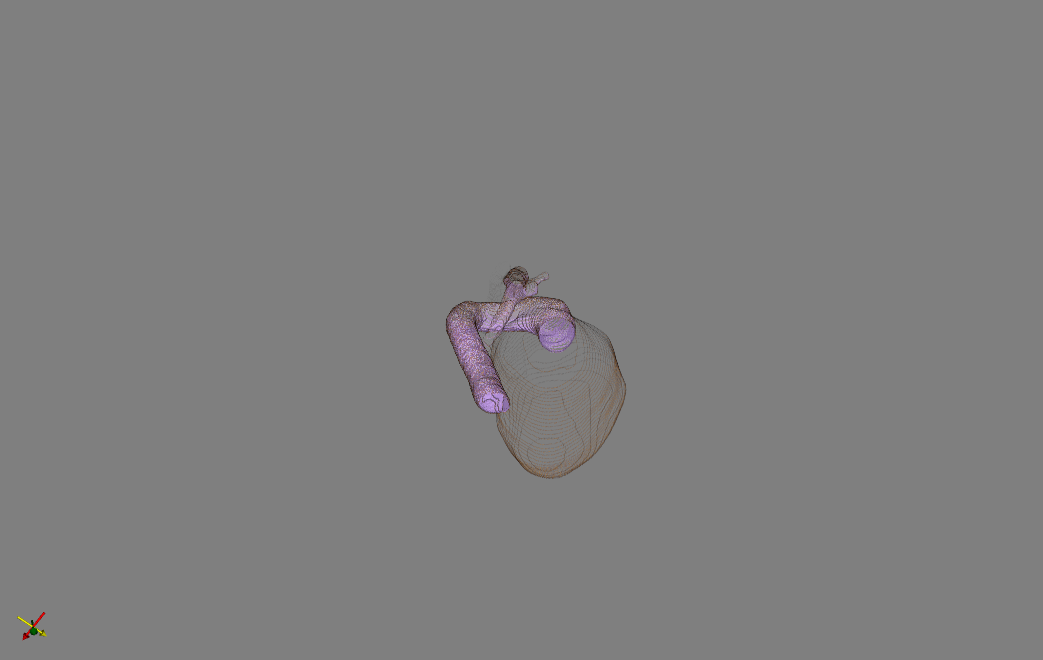
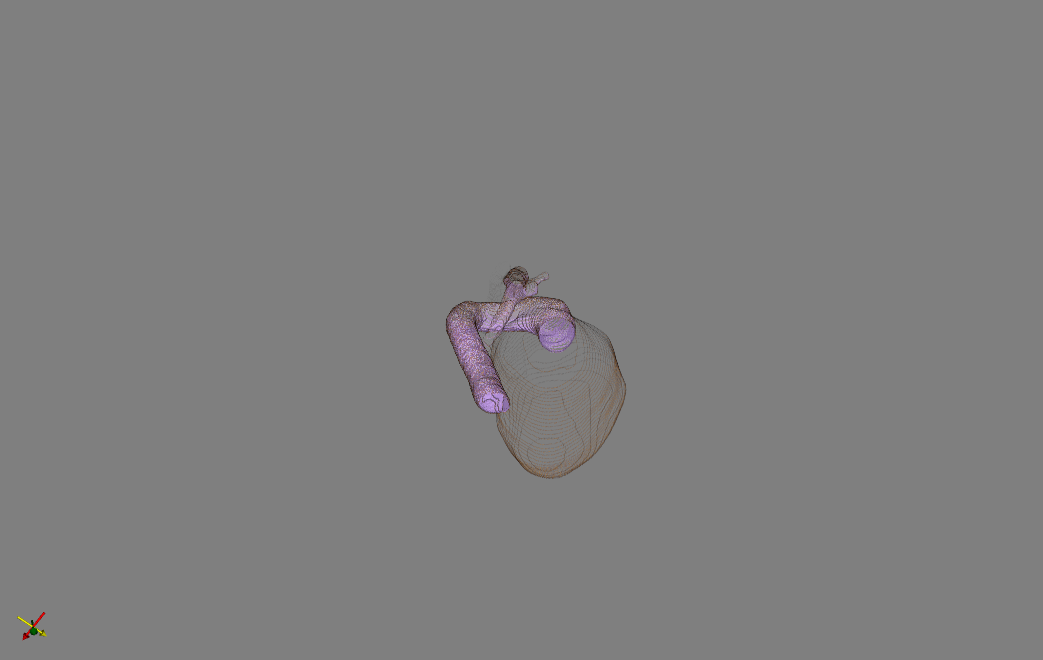

<IPython.core.display.Javascript object>

In [10]:
view(seg_image)

In [22]:
seg_image
seg_image.origin = list(itk.origin(ct_image))
seg_image.spacing = list(itk.spacing(ct_image))
seg_image.direction = itk.array_from_matrix(ct_image.GetDirection())


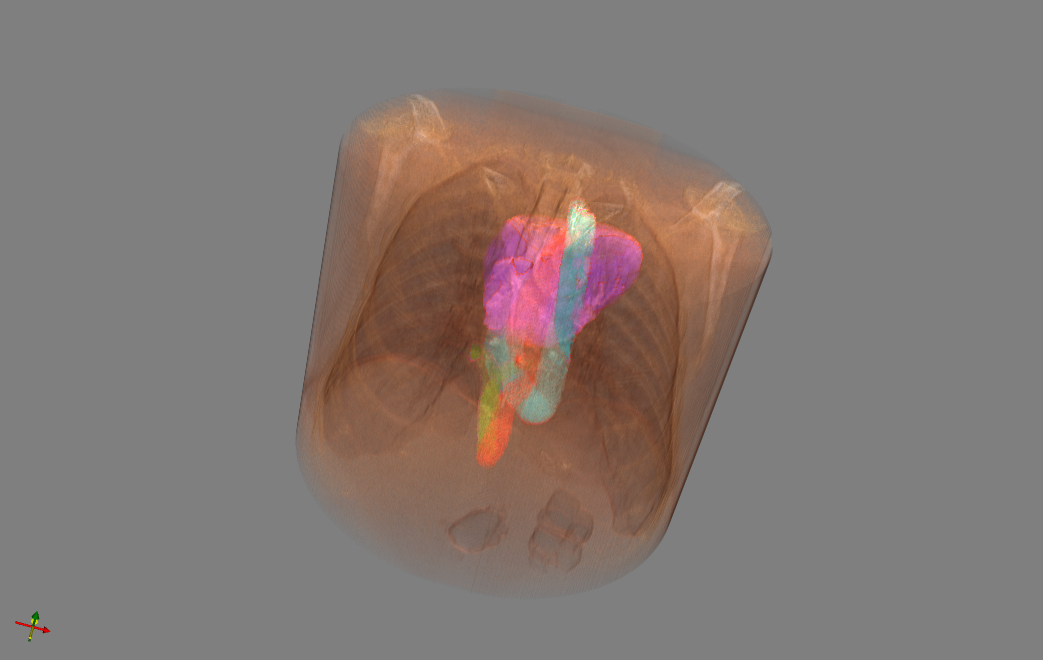
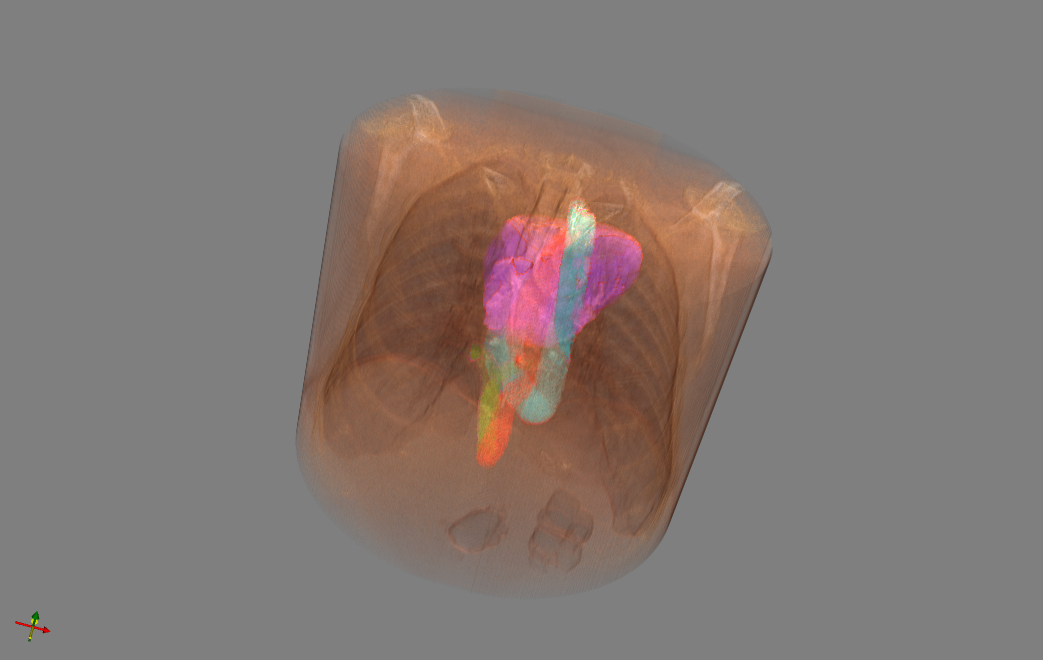

<IPython.core.display.Javascript object>

In [23]:
segthor_viewer = view(ct_image, label_image=seg_image)

In [10]:
print(seg_image)

Image(
    imageType=ImageType(dimension=3, componentType='int16', pixelType='Scalar', components=1),
    name='',
    origin=[-177.300003, 168.339722, 3.80999756],
    spacing=[0.660156, 0.660156, 2.5],
    direction=array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]]),
    size=[512, 512, 109],
    metadata=[],
    data=array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16),
    bufferedRegion={'index': [0, 0, 0], 'size': [512, 512, 109]}
)

In [11]:
print(ct_image)

Image (0x5e4d0e90b850)
  RTTI typeinfo:   itk::Image<int, 3u>
  Reference Count: 1
  Modified Time: 22467
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 294
  UpdateMTime: 22466
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 110]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 110]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 110]
  Spacing: [0.660156, 0.660156, 2.5]
  Origin: [-177.3, -169, -268.69]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.660156 0 0
0 0.660156 0
0 0 2.5

  PointToIndexMatrix: 
1.51479 0 0
0 1.51479 0
0 0 0.4

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x5e4d0e79edd0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, int>
      Reference Count: 1
      Modified Time: 683
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x7fd392400010
      Container manages memory: true
      Size: 28835840
      Capacity: 28835840

### Run the next cells to download and view the data inline or [click here to view the data immediately](https://kitware.github.io/itk-vtk-viewer/app/?image=https://data.kitware.com/api/v1/file/61b61cd74acac99f42a7ec84/download/HeadMRA.mha) (no download needed) with the itk-vtk-viewer!

In [ ]:
head_image_file = pooch.retrieve('https://data.kitware.com/api/v1/file/61b61cd74acac99f42a7ec84/download',
                           fname='HeadMRA.mha',
                           known_hash='33607e7b9fcbfd09135e15cbe27e1d83f233ab3ceba3d4e215928f879e96e14f')
head_image = itk.imread(head_image_file)


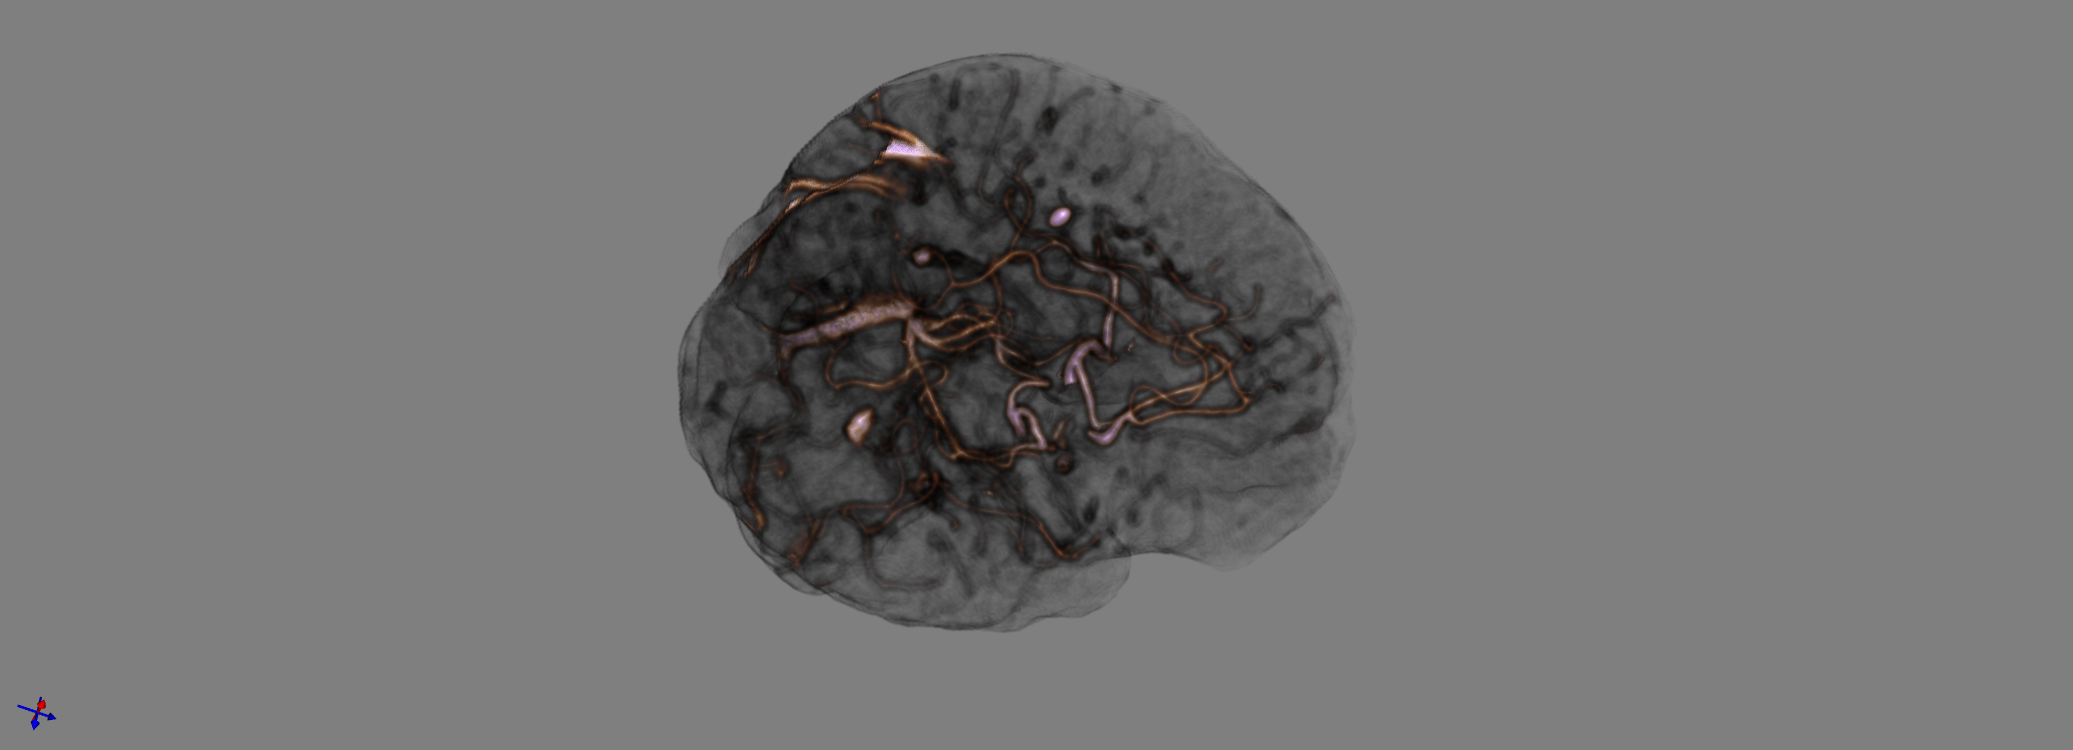
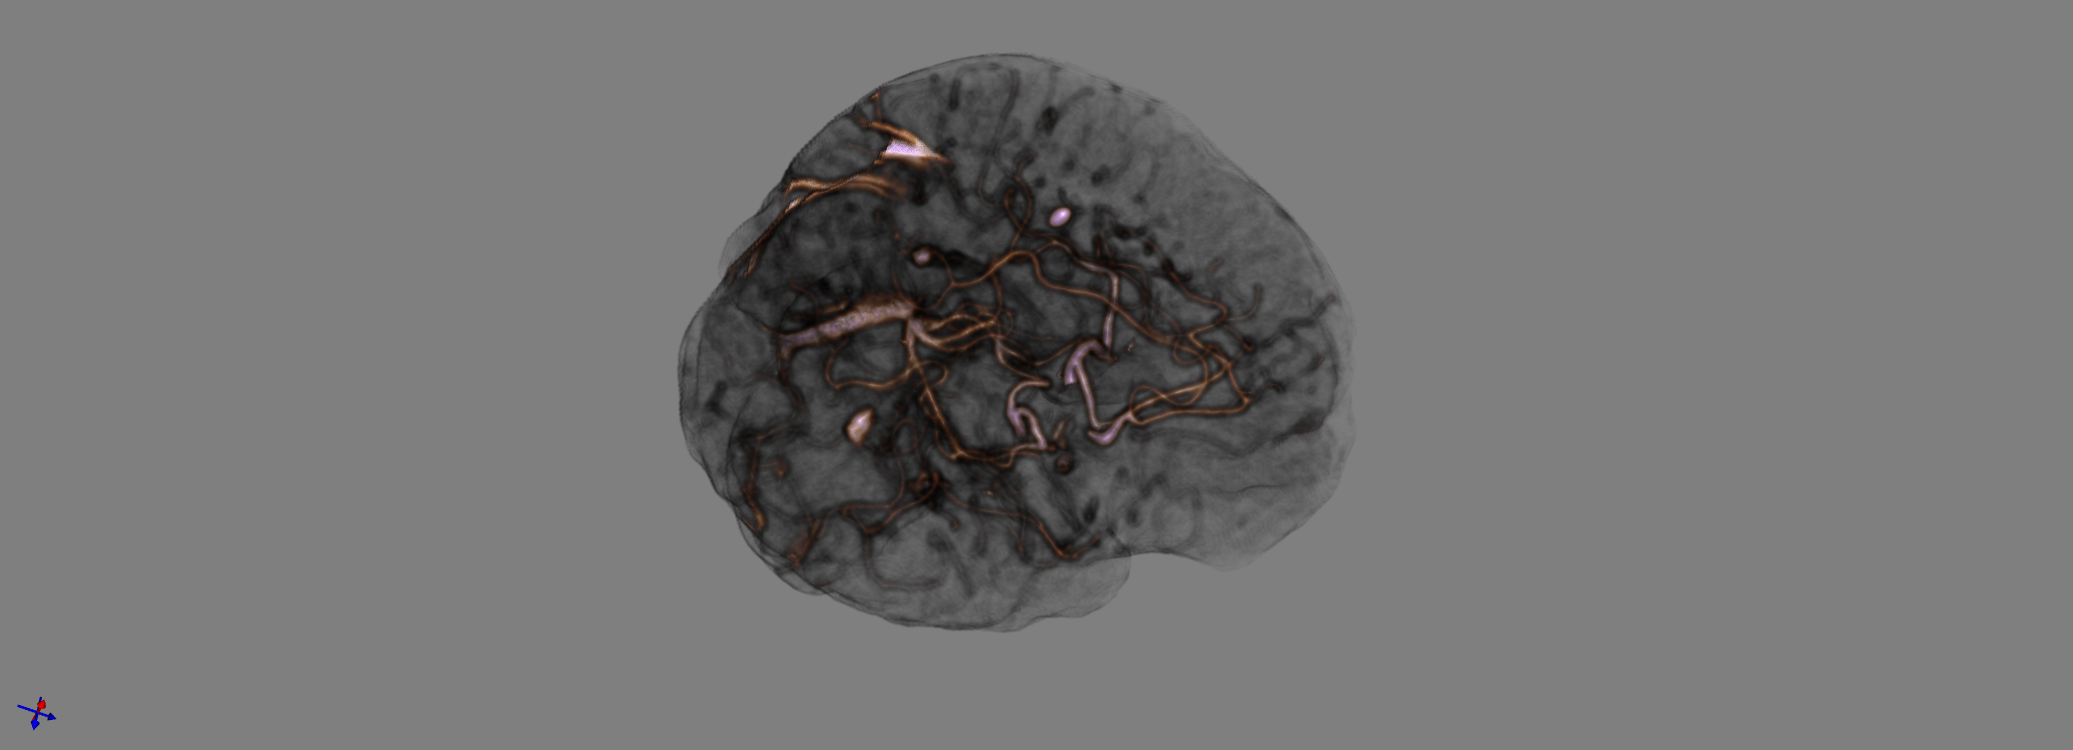

<IPython.core.display.Javascript object>

In [16]:
head_viewer = view(head_image)